In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
from matplotlib import cm
import matplotlib.ticker as ticker
import numpy as np
import os
import scipy.io
import seaborn as sb
from scipy.fftpack import fft
import csv
import pandas as pd
from scipy.signal import butter, filtfilt
import glob
import seaborn as sns
from scipy import stats
from scipy import signal
from statsmodels.graphics.gofplots import qqplot, qqline
sns.set(style="ticks")

In [2]:
# Pathways
source = r"E:\Downloads\MothAbdominal\Centroids_Trimmed"
figpath = r"E:\Downloads\MothAbdominal\Tortuosity"

In [3]:
csv_list = glob.glob(source + '/*_*.csv')
csv_list[0][45:]

'Experimental_1_0_52688.csv'

In [4]:
len(csv_list)

17

In [5]:
def Tortuosity(x, time):
    
    
    t = time/100
    
    Nx = len(x)  #number of points
    Nt = Nx
    Time = t[-1]-t[0]   #total sample time (in seconds)c
    fs = Nx/Time   # sample frequency
    TT = 1/fs  #delta t.
 
    meanx = np.mean(x)
    
    # . fftxvel is complex with real and imaginary part.
    #Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
    fftx = fft(x-meanx)    # this is the Fourier tranform of the x velocity
    xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  

    
    return xf, Nx, fftx

C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars


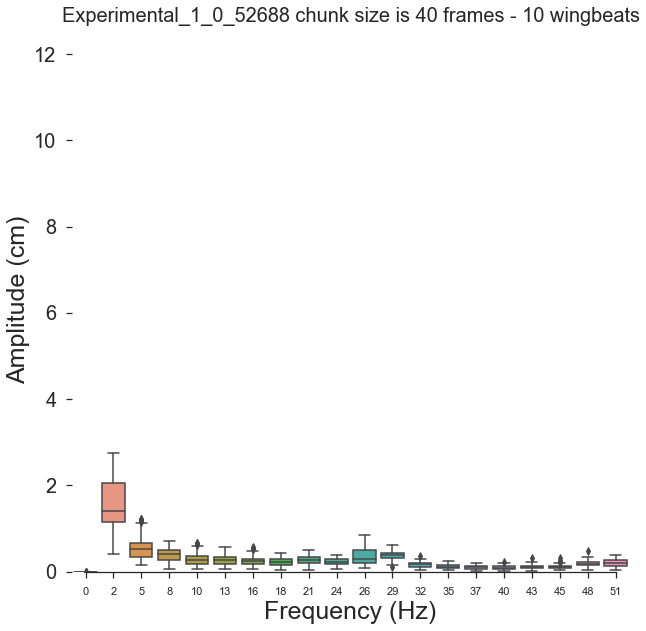

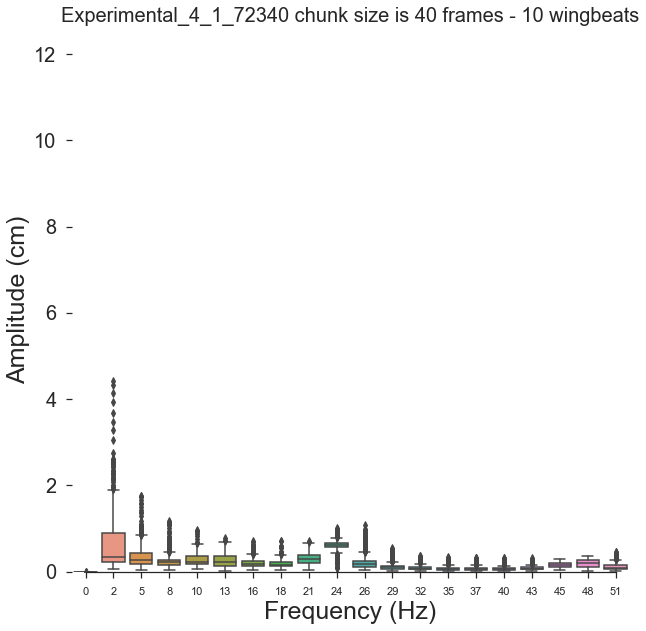

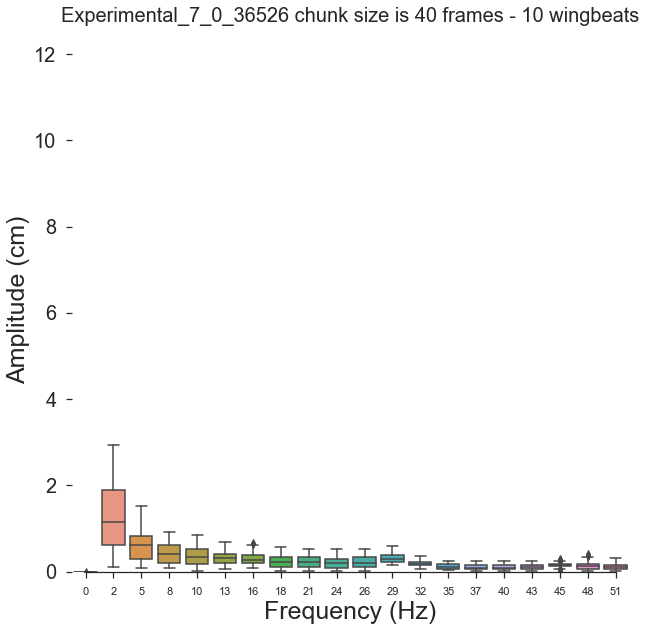

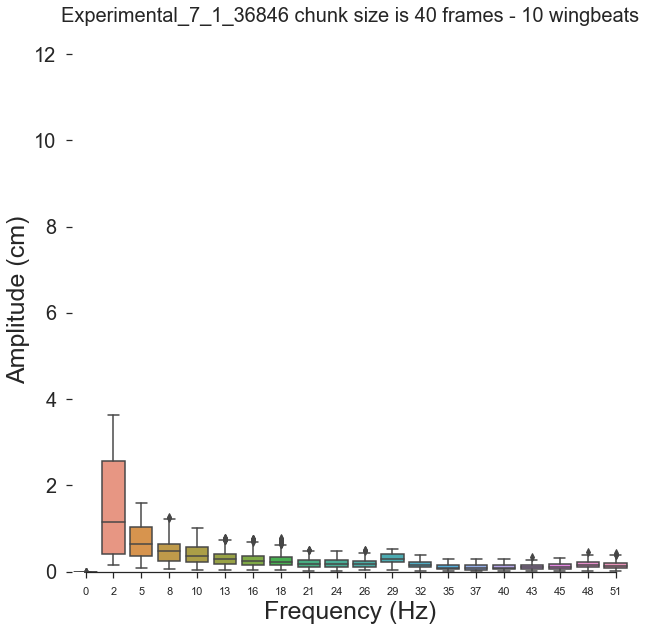

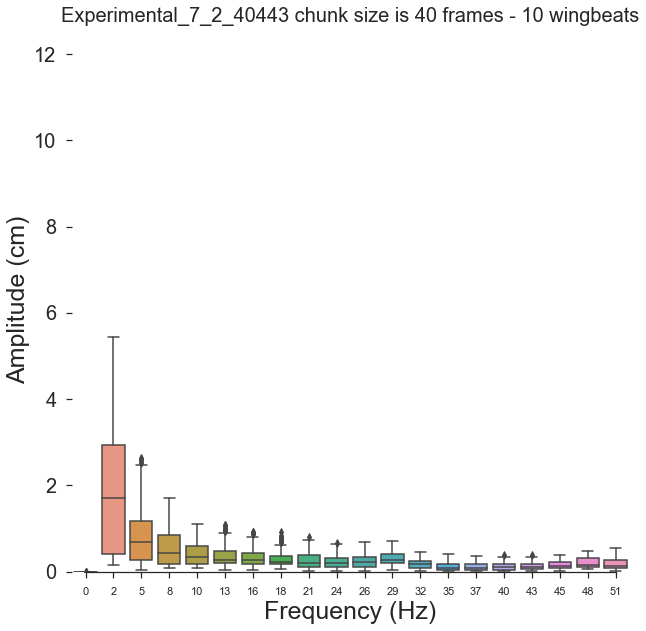

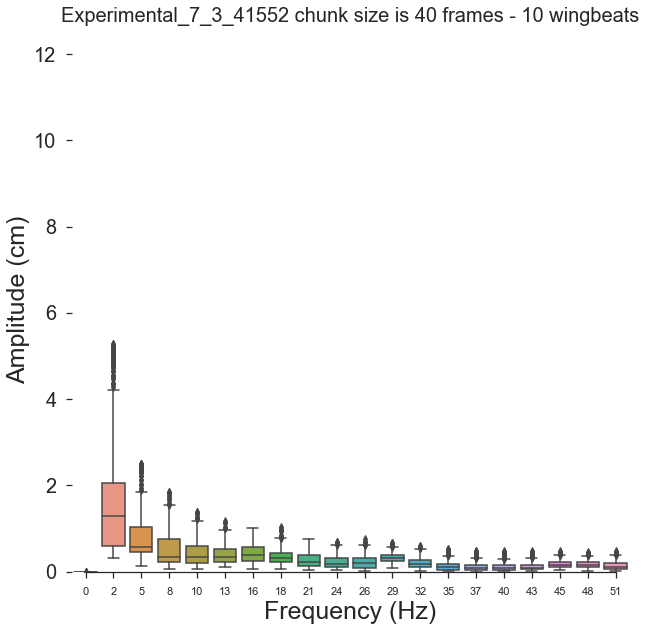

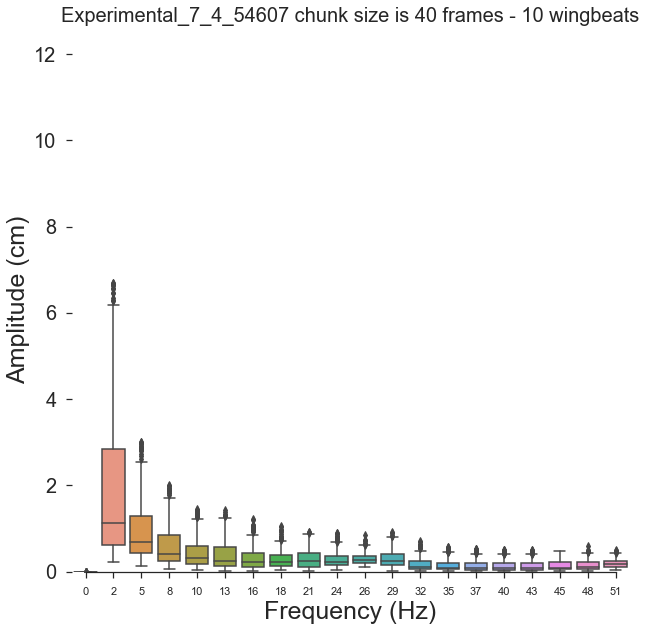

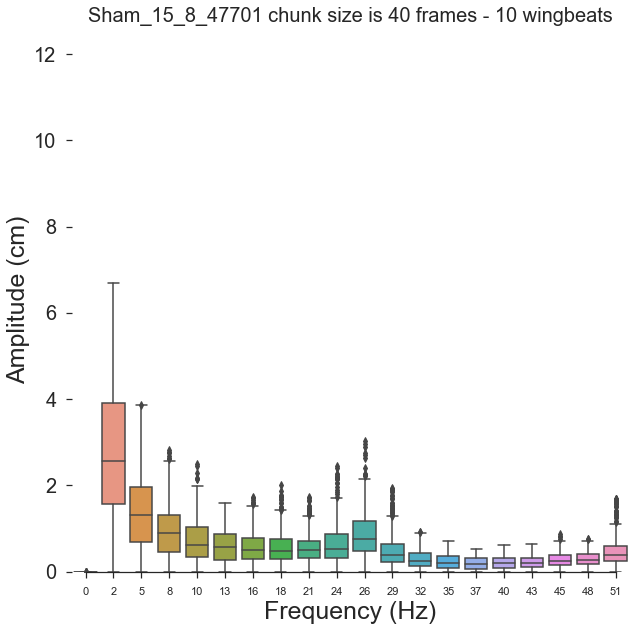

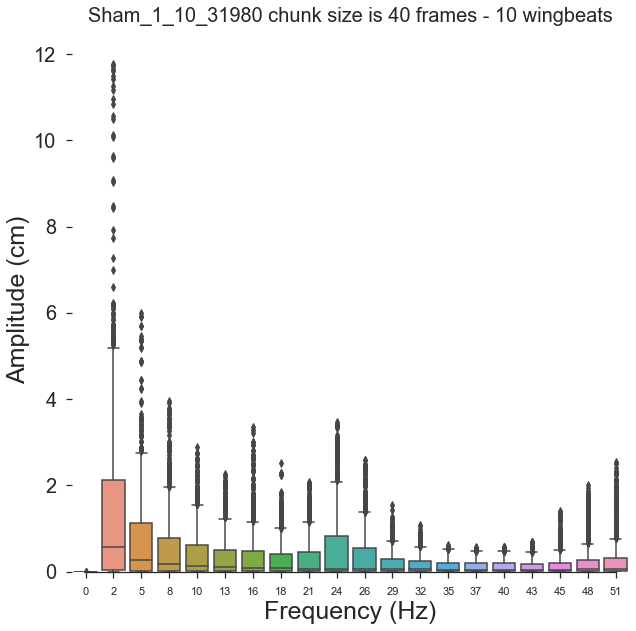

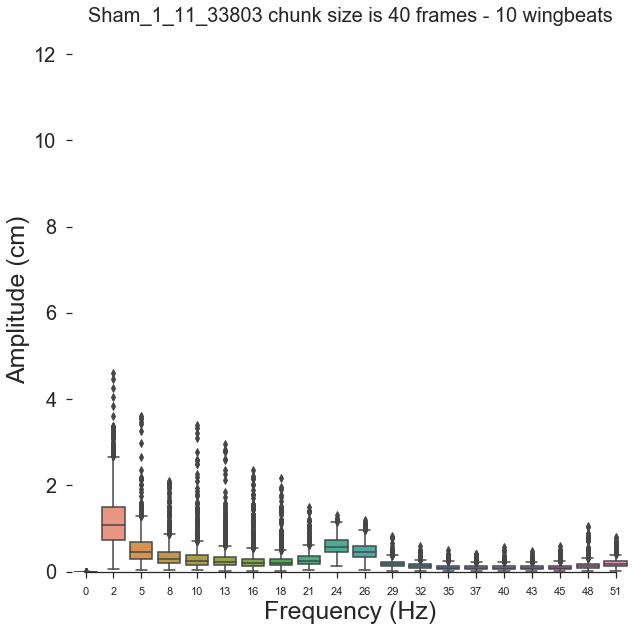

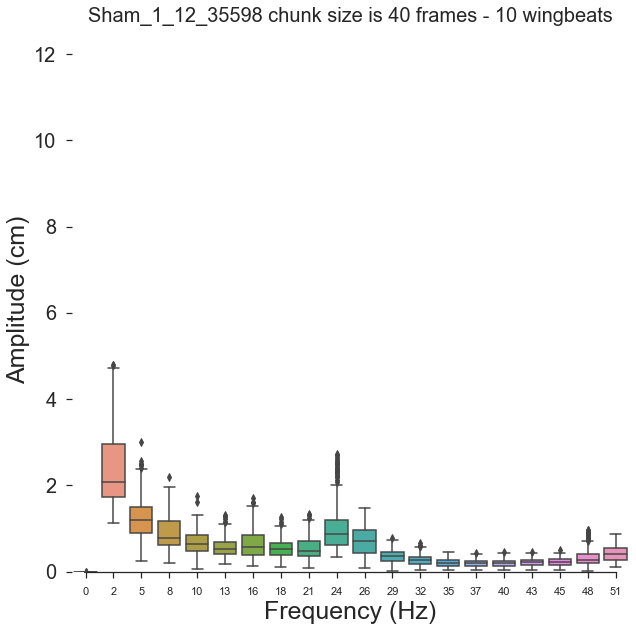

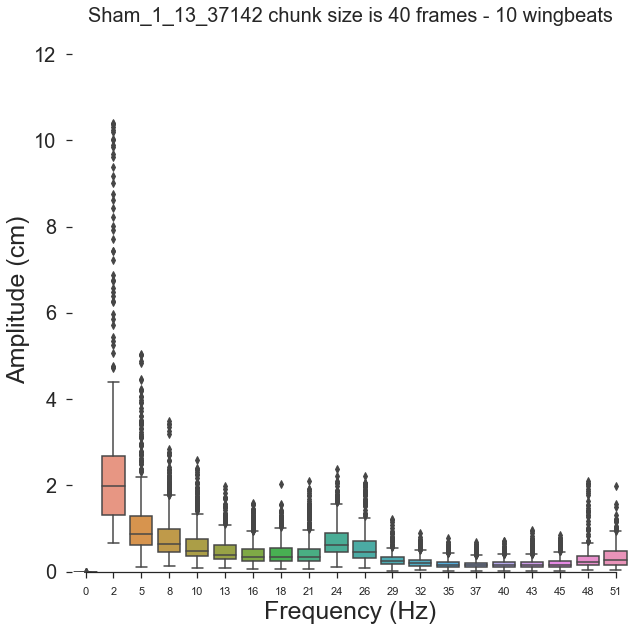

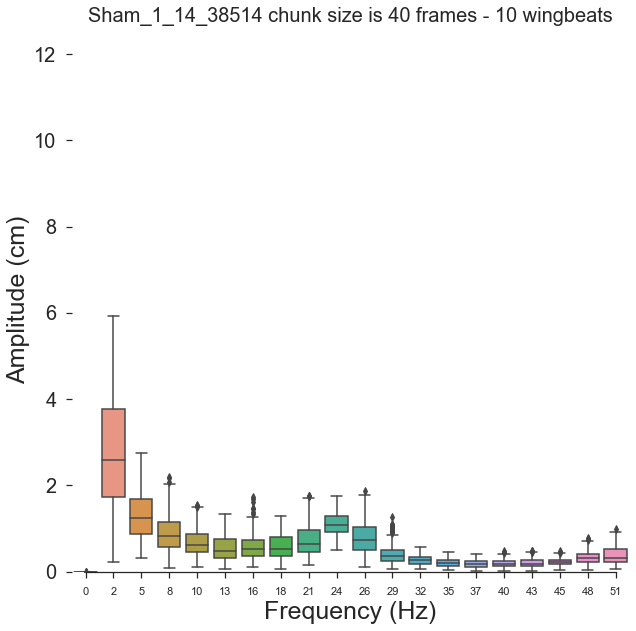

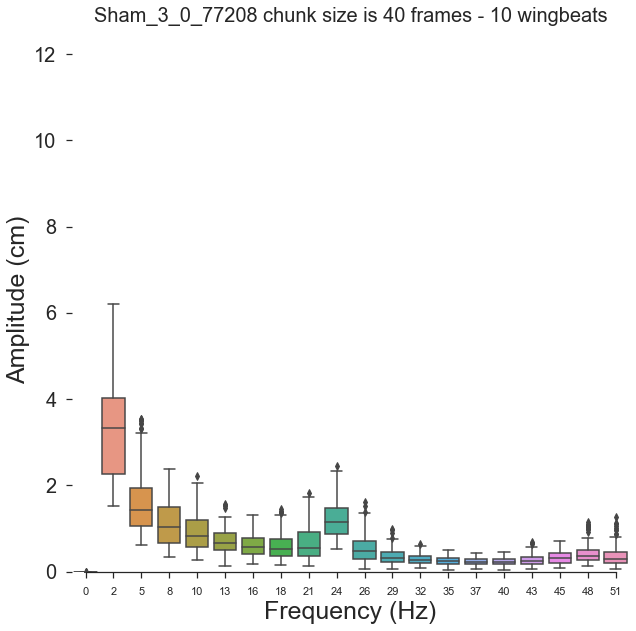

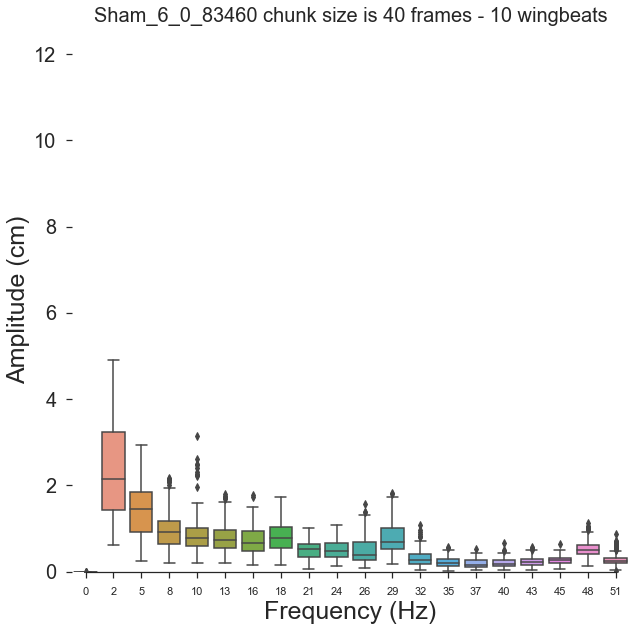

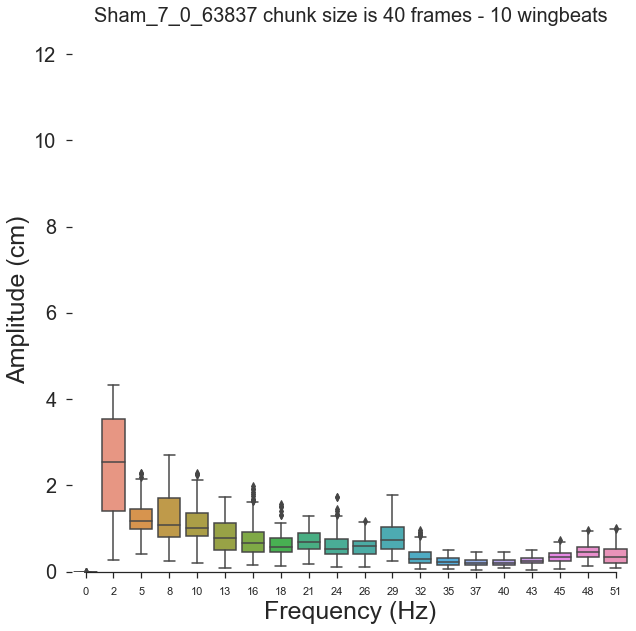

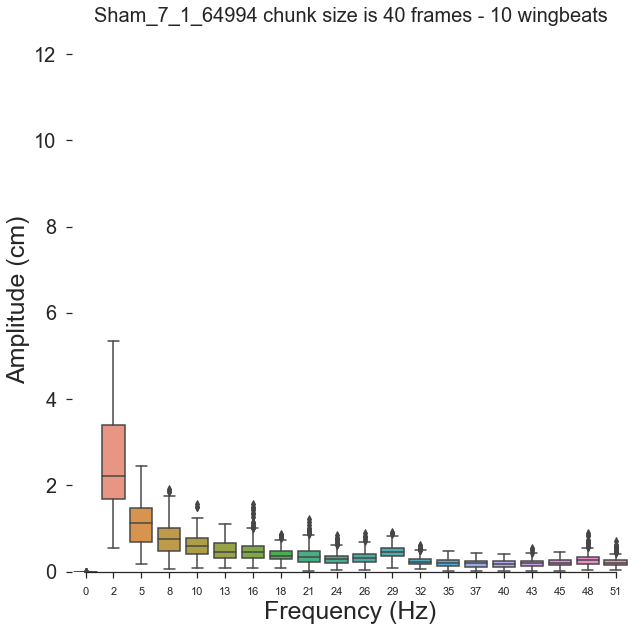

In [14]:
mean_list = []
std_list = []
visit_list = []
name_list = []
chunk = 40
trouble = []
fh_means,sh_means, first_val = [], [], []
fh_stds, sh_stds = [], []
f_s_ratio_means, f_s_ratio_stds = [], []

for ele in csv_list:
    df = pd.read_csv(ele)
   
    
 
        
    visit = df.VisitNumber[0]
    visit_list.append(visit)
    x, y, time = df.X_position.values, df.Y_position.values, df.FrameNumber.values
          
    
    
    x_, N_, fft_ = Tortuosity(x, time)
    y_, N__, fft__ = Tortuosity(y, time)
    sum_ = ((2.0/N__ * np.abs(fft__[0:N__//2])) + (2.0/N_ * np.abs(fft_[0:N_//2])))
    

    
    n = np.arange(0,len(x)-chunk,1)
    ratio_list = []

    sum_count = chunk//2*[0]
    
    sum_list = []
    
    for element in n:


        shortest_path = np.sqrt((x[element+chunk]-x[element])**2 + (y[element+chunk]-y[element])**2)


        actual_list = 0
        i = 0
        while i < len(x[element:element+chunk]):



            actual_path = np.sqrt((x[element:element+chunk+1][i+1]-x[element:element+chunk+1][i])**2 + (y[element:element+chunk+1][i+1]-y[element:element+chunk+1][i])**2)
            actual_list += actual_path



            i +=1
        
        
        
        
    
        
        

        xf, Nx, fftx = Tortuosity(x[element:element+chunk], time[element:element+chunk])
        yf, Ny, ffty = Tortuosity(y[element:element+chunk], time[element:element+chunk])
        sum_xy = ((2.0/Ny * np.abs(ffty[0:Ny//2])) + (2.0/Nx * np.abs(fftx[0:Nx//2])))
        
        sum_list.append(sum_xy)
        
        sum_count += sum_xy
      
        
        ratio = actual_list/shortest_path
        ratio_list.append(ratio)
    
    
    
    sum_list = np.asarray(sum_list)
    sum_tran = np.transpose(sum_list)

    condition = []

    for i in np.arange(0,len(yf)):
        condition.extend(sum_tran.shape[1]*[yf[i]])

    values_df = pd.DataFrame({"amplitudes": sum_tran.ravel(), "frequency": np.array(condition,dtype=int), "actualfreq": condition})




    f, ax = plt.subplots(figsize=(10, 10))
    sns.boxplot(x="frequency", y="amplitudes",
                        data= values_df)


    for tick in ax.get_yticklabels():
        tick.set_fontsize(20) 
    ax.xaxis.grid(False)
    ax.set_ylabel("Amplitude (cm)", size = 25)
    ax.set_title(ele[45:-4] + " chunk size is 40 frames - 10 wingbeats", size = 20)
    ax.set_xlabel("Frequency (Hz)", size = 25)
    ax.set_ylim(0,12.6)
    sns.despine(trim=True, left=True)
    
    
    
    first_half, second_half, f_v = sum_count[1:10]/(element), sum_count[10:-1]/(element), sum_count[1:2]/(element)
    f_s_ratio = second_half/first_half
    f_s_ratio_means.append(np.mean(f_s_ratio))
    f_s_ratio_stds.append(np.std(f_s_ratio))
    first_val.append(np.mean(f_v))                                                                 
    fh_means.append(np.mean(first_half)), sh_means.append(np.mean(second_half))
    fh_stds.append(np.std(first_half)), sh_stds.append(np.std(second_half))

    name_list.append(ele[45:-4])
    finite = np.asarray(ratio_list)[~np.isinf(ratio_list)]
    mean = np.mean(finite)
    std = np.std(finite)
    mean_list.append(mean)
    std_list.append(std)
    
    
    
    if ~np.isfinite(np.mean(ratio_list)) or len(finite) < (200-chunk):
        trouble.append((ele[45:-4], csv_list.index(ele), len(x), len(np.asarray(ratio_list)[~np.isfinite(ratio_list)])))
        
    plt.savefig(figpath + "\\boxplots\\" + ele[45:-4] + ".png")


In [ ]:
list_ = [csv_list.index(source + "\\" + element[0] + ".csv") for element in trouble]
list_path = [csv_list[element] for element in list_]

In [ ]:
names = []
for element in trouble:
    names.append(element[0])

In [ ]:
#feed this into the mixed effects model in R
name_list_ = []
for name in name_list:
    if name.startswith('L0.1'):
        name = name[:12]
        if name.endswith('_'):
            name = name[:-1]
    elif name.startswith('L50'):
        name = name[:11]
        if name.endswith('_'):
            name = name[:-1]
    
    name_list_.append(name)
#     print(name)
name_list = name_list_

In [ ]:
condition = []
for name in name_list:
    if name.startswith("Sham"):
        condition.append("Sham")
    else:
        condition.append("Experimental")

In [ ]:
len(mean_list),len(std_list), len(name_list), len(visit_list), len(fh_means), len(sh_means), len(fh_means), len(fh_stds), len(sh_stds), len(fh_stds), len(first_val)

In [ ]:
new_df = (pd.DataFrame({'name' : name_list, 
                        'std_tortuosity': std_list, 'mean_tortuosity' : mean_list, 
                        'first_mean_amplitude': fh_means, 'second_mean_amplitude': sh_means, 
                        'ratio_mean_amplitude': f_s_ratio_means, 'first_val_only_amplitude': first_val,
                        'condition': condition, 'visit_number': visit_list}))
new_df = new_df.sort_values(by=['name','visit_number'])
new_df.reset_index(drop=True, inplace=True)
new_df.to_csv(figpath + "\\tortuosity_values.csv")

In [ ]:
new_df = pd.read_csv(figpath + "\\tortuosity_values.csv")

In [ ]:
sham = new_df[new_df.condition == "Sham"].mean_tortuosity.values
exp = new_df[new_df.condition == "Experimental"].mean_tortuosity.values

In [ ]:
#could make these log to get rid of non-normal distribution!
f, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(x="condition", y="mean_tortuosity",
                    data= new_df, inner = None, palette=['orangered', 'slateblue'])
sns.boxplot(x="condition", y="mean_tortuosity",
                    data= new_df, width = 0.3)
sns.swarmplot(x="condition", y="mean_tortuosity",
                    data= new_df, size=5, color="0.3", linewidth=0)
for tick in ax.get_yticklabels():
    tick.set_fontsize(20) 
ax.xaxis.grid(False)
ax.set_ylabel("Path Ratio Tortuosity", size = 30)
ax.set_xlabel("Condition", size = 30)
ax.set_xticklabels(["Experimental","Sham"], size = 30)
sns.despine(trim=True, left=True)

plt.savefig(figpath + "\path_tort.png")

In [ ]:
qqplot(low, line='s', c = "purple"), qqplot(high, line='s', c = "orangered")
print(stats.shapiro(low), 'low'), print(stats.shapiro(high), 'high')

In [ ]:
#this method assumes each data point is independent. However, even under this assumption there are no significant differences 
n_bins = 50
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(low, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'purple')
n, bins, patches = ax.hist(high, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'darkorange')

stats.ks_2samp(low, high), stats.mannwhitneyu(low, high)

In [ ]:
#need to add the original values to ground these comparisons
f, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(x="condition", y="first_mean_amplitude",
                    data= new_df, inner = None, palette=['orangered', 'slateblue'])
sns.boxplot(x="condition", y="first_mean_amplitude",
                    data= new_df, width = 0.3)
sns.swarmplot(x="condition", y="first_mean_amplitude",
                    data= new_df, size=5, color="0.3", linewidth=0)
ax.set_ylim(0,1.5)

for tick in ax.get_yticklabels():
    tick.set_fontsize(20) 
ax.xaxis.grid(False)
ax.set_ylabel("Low Band Amplitude", size = 30)
ax.set_xlabel("Condition", size = 30)
ax.set_xticklabels(["Experimental","Sham"], size = 30)
sns.despine(trim=True, left=True)
plt.savefig(figpath + "\low_band.png")

In [ ]:
#this method assumes each data point is independent. However, even under this assumption there are no significant differences 
s_f_amplitude = new_df[new_df.condition == "Low"].first_mean_amplitude.values
e_f_amplitude = new_df[new_df.condition == "High"].first_mean_amplitude.values

fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(s_f_amplitude, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'purple')
n, bins, patches = ax.hist(e_f_amplitude, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'darkorange')

stats.ks_2samp(s_f_amplitude, e_f_amplitude), stats.mannwhitneyu(s_f_amplitude, e_f_amplitude)

In [ ]:
nonkosher_vids = new_df[(new_df.condition == "Low") & (new_df.second_mean_amplitude > .39)]
nonkosher = nonkosher_vids[['name','visit_number']]
nonkosher

In [ ]:
#need to add the original values to ground these comparisons
f, ax = plt.subplots(figsize=(10, 10))

sns.violinplot(x="condition", y="second_mean_amplitude",
                    data= new_df, inner = None, palette=['orangered', 'slateblue'])
sns.boxplot(x="condition", y="second_mean_amplitude",
                    data= new_df, width = 0.1)
sns.swarmplot(x="condition", y="second_mean_amplitude",
                    data= new_df, size=5, color="0.3", linewidth=0)
ax.set_ylim(0,0.49)
for tick in ax.get_yticklabels():
    tick.set_fontsize(20) 
ax.xaxis.grid(False)
ax.set_ylabel("High Band Amplitude", size = 30)
ax.set_xlabel("Condition", size = 30)
ax.set_xticklabels(["Experimental","Sham"], size = 30)
sns.despine(trim=True, left=True)
plt.savefig(figpath + "\high_band.png")

In [ ]:
#this method assumes each data point is independent. However, even under this assumption there are no significant differences 
s_s_amplitude = new_df[new_df.condition == "Low"].second_mean_amplitude.values
e_s_amplitude = new_df[new_df.condition == "High"].second_mean_amplitude.values

fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(s_s_amplitude, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'purple')
n, bins, patches = ax.hist(e_s_amplitude, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'darkorange')

stats.ks_2samp(s_s_amplitude, e_s_amplitude), stats.mannwhitneyu(s_s_amplitude, e_s_amplitude)

In [ ]:
#need to add the original values to ground these comparisons
f, ax = plt.subplots(figsize=(10, 10))


sns.violinplot(x="condition", y="ratio_mean_amplitude",
                    data= new_df, inner = None, palette=['orangered', 'slateblue'])
sns.boxplot(x="condition", y="ratio_mean_amplitude",
                    data= new_df, width = 0.3)
sns.swarmplot(x="condition", y="ratio_mean_amplitude",
                    data= new_df, size=5, color="0.3", linewidth=0)


for tick in ax.get_yticklabels():
    tick.set_fontsize(30) 
ax.xaxis.grid(False)
ax.set_ylabel("Ratio amplitudes", size = 30)
ax.set_xlabel("Condition", size = 40)
ax.set_xticklabels(["Experimental","Sham"], size = 30)
sns.despine(trim=True, left=True)
plt.savefig(figpath + "\_ratio.png")

In [ ]:
#this method assumes each data point is independent. However, even under this assumption there are no significant differences 
s_r_amplitude = new_df[new_df.condition == "Low"].ratio_mean_amplitude.values
e_r_amplitude = new_df[new_df.condition == "High"].ratio_mean_amplitude.values

fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(s_r_amplitude, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'purple')
n, bins, patches = ax.hist(e_r_amplitude, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'darkorange')

stats.ks_2samp(s_r_amplitude, e_r_amplitude), stats.mannwhitneyu(s_r_amplitude, e_r_amplitude)

In [ ]:
#need to add the original values to ground these comparisons
f, ax = plt.subplots(figsize=(10, 10))


sns.violinplot(x="condition", y="first_val_only_amplitude",
                    data= new_df, inner = None, palette=['orangered', 'slateblue'])
sns.boxplot(x="condition", y="first_val_only_amplitude",
                    data= new_df, width = 0.3)
sns.swarmplot(x="condition", y="first_val_only_amplitude",
                    data= new_df, size=5, color="0.3", linewidth=0)


for tick in ax.get_yticklabels():
    tick.set_fontsize(20) 
ax.xaxis.grid(False)
ax.set_ylabel("First Frequency Amplitude", size = 30)
ax.set_xlabel("Condition", size = 40)
ax.set_xticklabels(["Experimental","Sham"], size = 30)
sns.despine(trim=True, left=True)
plt.savefig(figpath + "\_first_val_only.png")

In [ ]:
#this method assumes each data point is independent. However, even under this assumption there are no significant differences 
s_fv_amplitude = new_df[new_df.condition == "Low"].first_val_only_amplitude.values
e_fv_amplitude = new_df[new_df.condition == "High"].first_val_only_amplitude.values

fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(s_fv_amplitude, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'purple')
n, bins, patches = ax.hist(e_fv_amplitude, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'darkorange')

stats.ks_2samp(s_fv_amplitude, e_fv_amplitude), stats.mannwhitneyu(s_fv_amplitude, e_fv_amplitude)

In [ ]:
new_df